In [145]:
"""
Demonstration of Newton's method  for finding a root
and gradient descent for finding a minimum of a function
for the case of a scalar function

(c) Timo Koch 2024 MIT License
"""

import matplotlib.pyplot as plt
import numpy as np

def newton(f, df, x0, tol, max_iter):
    """Newton's method for finding a root of a function."""
    x = x0
    history = np.zeros(max_iter+1)
    history[0] = x
    for i in range(max_iter):
        x = x - f(x)/df(x)
        history[i+1] = x
        if abs(history[i+1]-history[i]) < tol:
            break
    return x, i, history[0:i+1]

def gradient_descent(f, df, x0, tol, max_iter, alpha, use_momentum=False):
    """Gradient descent method for finding a minimum of a function.
        If use_momentum is True, the method uses a momentum relaxation term which
        yields a slighty improved version of the gradient descent method.
    """
    x = x0
    history = np.zeros(max_iter+1)
    history[0] = x
    for i in range(max_iter):
        if use_momentum:
            x = x - alpha*df(x) + 0.9*(history[i]-history[i-1])
        else: # regular gradient descent
            x = x - alpha*df(x)
        history[i+1] = x
        if abs(history[i+1]-history[i]) < tol:
            break
    return x, i, history[0:i+1]

def sigmoid(x):
    """Sigmoid function also called logistic function."""
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    """Derivative of the sigmoid function."""
    return sigmoid(x)*(1-sigmoid(x))

def d2_sigmoid(x):
    """Second derivative of the sigmoid function."""
    return sigmoid(x)*(1-sigmoid(x))**2 - sigmoid(x)**2*(1-sigmoid(x))

def L(x):
    """Loss function (has minimum at x=1)."""
    return (0.5-sigmoid(x-1))**2 + 4

def dL(x):
    """Derivative of the loss function (has root at x=1)."""
    return -2*(0.5-sigmoid(x-1))*d_sigmoid(x-1)

def d2L(x):
    """Second derivative of the loss function."""
    return 2*d_sigmoid(x-1)**2 - 2*(0.5-sigmoid(x-1))*d2_sigmoid(x-1)


Newton's method: x = 1.000000, i = 3
Gradient descent: x = 0.996155, i = 193


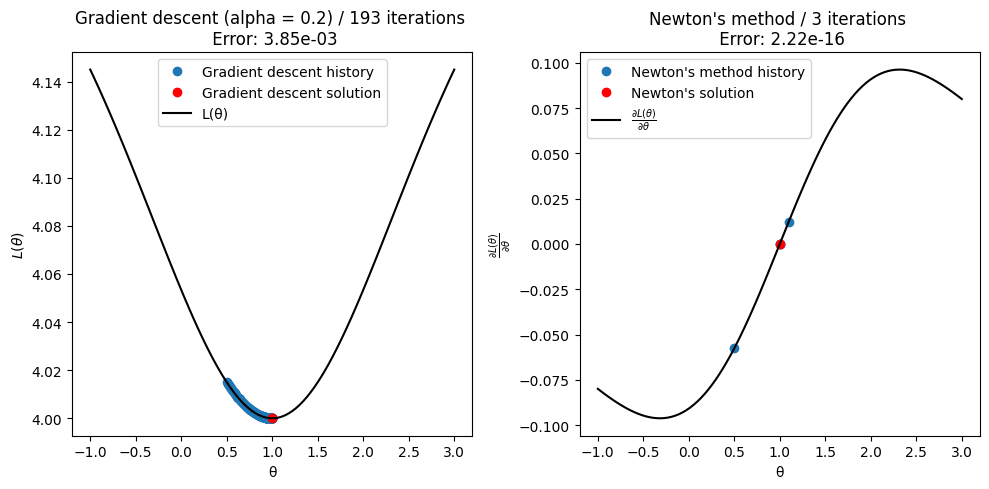

In [146]:
# parameter settings
x0 = 0.5
tol = 1e-4
max_iter = 1000
alpha = 0.2

x_analytical_solution = 1
x_newton, i_newton, history_newton = newton(dL, d2L, x0, tol, max_iter)
x_gd, i_gd, history_gd = gradient_descent(L, dL, x0, tol, max_iter, alpha, use_momentum=False)
print("Newton's method: x = %f, i = %d" % (x_newton, i_newton))
print("Gradient descent: x = %f, i = %d" % (x_gd, i_gd))

# plot convergence history
x = np.linspace(-1, 3, 100)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history_gd, L(np.array(history_gd)), 'o', label="Gradient descent history")
ax[0].plot(x_gd, L(x_gd), 'ro', label="Gradient descent solution")
ax[0].plot(x, L(x), 'k-', label="L(θ)")

ax[1].plot(history_newton, dL(np.array(history_newton)), 'o', label="Newton's method history")
ax[1].plot(x_newton, dL(x_newton), 'ro', label="Newton's solution")
ax[1].plot(x, dL(x), 'k-', label=r"$\frac{\partial L(θ)}{\partial θ}$")

ax[0].set_title(f"Gradient descent (alpha = {alpha}) / {i_gd} iterations \n Error: {abs(x_gd - x_analytical_solution):.2e}")
ax[1].set_title(f"Newton's method / {i_newton} iterations \n Error: {abs(x_newton - x_analytical_solution):.2e}")
ax[0].set_xlabel("θ")
ax[0].set_ylabel(r"$L(θ)$")
ax[1].set_xlabel("θ")
ax[1].set_ylabel(r"$\frac{\partial L(θ)}{\partial θ}$")

ax[0].legend()
ax[1].legend()

fig.tight_layout()
plt.show()